In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_DB2_prep_olsson.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
## np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
# file_path_Train= "/content/drive/My Drive/DB2/nina_pro_DB2_Train.csv"
# file_path_Test= "/content/drive/My Drive/DB2/nina_pro_DB2_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,49,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)
#file_path= "./WISDM_ar_v1.1_raw.txt"

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [11]:
# The number of steps within one time segment
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 100
N_FEATURES = 12

In [12]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [13]:
def read_data_Train(file_path_Train):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [15]:
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/Train_data.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 39200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0
1,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
2,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
3,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
5,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
6,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
7,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
8,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0
9,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0


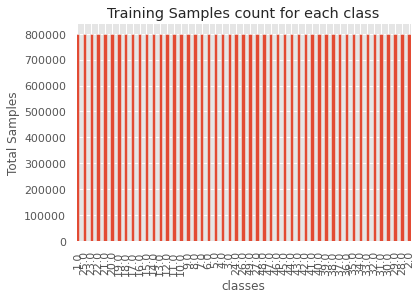

In [16]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [17]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/Test_data.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 19600000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0
1,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
2,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
3,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
4,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
5,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0
6,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0
7,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0
8,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0
9,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


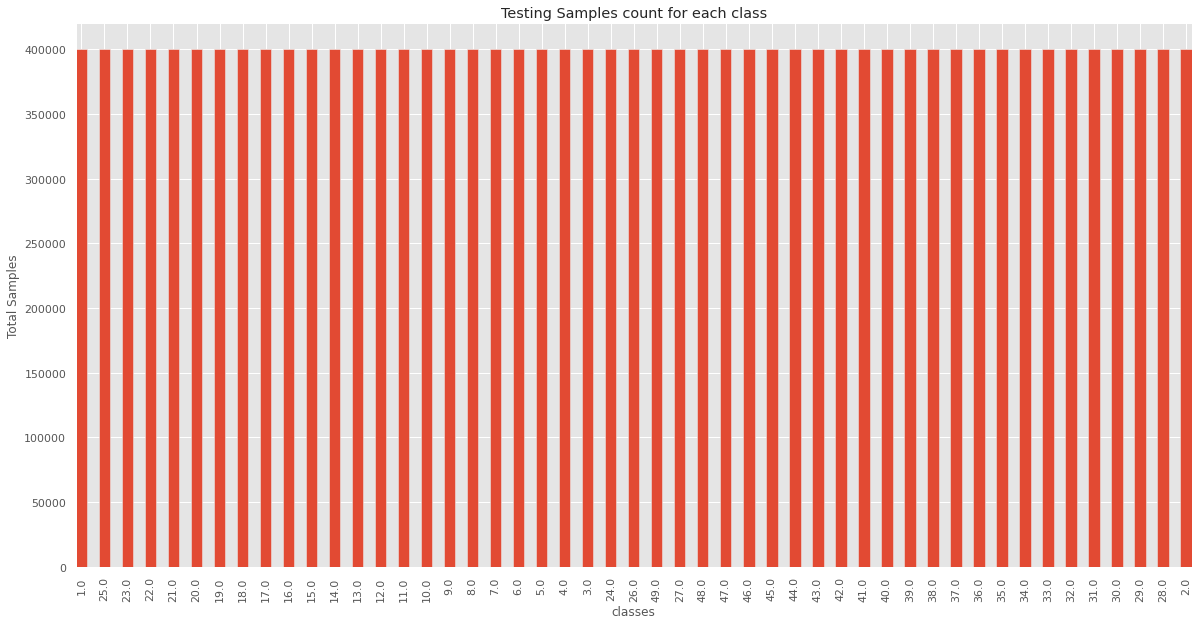

In [18]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [19]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,1.00000
1,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,1.00000
2,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00001,1.00000
3,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00001,1.00000
4,-0.00001,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00001,1.00000


In [20]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [21]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00846,-0.01596,0.01420,0.00274,0.01907,-0.02141,0.00165,0.02465,-0.01764,-0.00378,-0.00259,-0.74618,1.00000
1,-0.02661,-0.02800,0.09315,-0.00562,0.03312,-0.00684,0.00057,0.06341,-0.02912,0.00088,0.02632,-0.92234,1.00000
2,-0.06009,-0.03879,0.16693,-0.01361,0.04387,0.00630,0.00014,0.09728,-0.03845,0.00528,0.05528,-1.01610,1.00000
3,-0.09010,-0.04725,0.23058,-0.02059,0.05015,0.01726,0.00047,0.12537,-0.04556,0.00905,0.08314,-1.03591,1.00000
4,-0.11506,-0.05250,0.27968,-0.02597,0.05114,0.02554,0.00158,0.14670,-0.05063,0.01184,0.10867,-1.00009,1.00000


In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,1.00000
1,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,1.00000
2,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00001,1.00000
3,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00001,1.00000
4,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00001,0.00000,-0.00000,-0.00000,-0.00001,1.00000


In [24]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.00011,0.01899,0.00425,0.00571,-0.05048,-0.00154,0.00250,0.02997,0.00779,-0.00934,-0.00198,-0.44357,1.00000
1,-0.02456,0.02792,0.00942,0.02117,0.07856,0.01219,-0.01277,-0.06808,0.00467,-0.02122,-0.01266,-0.81523,1.00000
2,-0.04668,0.03674,0.01754,0.03541,0.19868,0.02397,-0.02698,-0.15951,0.00248,-0.03307,-0.02592,-1.19714,1.00000
3,-0.06534,0.04530,0.02888,0.04721,0.30279,0.03314,-0.03932,-0.23924,0.00120,-0.04418,-0.04162,-1.57707,1.00000
4,-0.07973,0.05340,0.04298,0.05551,0.38530,0.03945,-0.04914,-0.30322,0.00058,-0.05373,-0.05915,-1.93978,1.00000


In [26]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2      C3       C4       C5       C6       C7  \
0         0.00846 -0.01596 0.01420  0.00274  0.01907 -0.02141  0.00165   
1        -0.02661 -0.02800 0.09315 -0.00562  0.03312 -0.00684  0.00057   
2        -0.06009 -0.03879 0.16693 -0.01361  0.04387  0.00630  0.00014   
3        -0.09010 -0.04725 0.23058 -0.02059  0.05015  0.01726  0.00047   
4        -0.11506 -0.05250 0.27968 -0.02597  0.05114  0.02554  0.00158   
...           ...      ...     ...      ...      ...      ...      ...   
39199995  0.03409  0.01010 0.39564 -0.01182 -0.25243  0.04115 -0.00012   
39199996  0.03549  0.01581 0.37478 -0.00901 -0.24295  0.03851 -0.00278   
39199997  0.03516  0.01960 0.33856 -0.00631 -0.22063  0.03457 -0.00422   
39199998  0.03323  0.02145 0.28960 -0.00389 -0.18715  0.02962 -0.00442   
39199999  0.02981  0.02132 0.22966 -0.00191 -0.14349  0.02388 -0.00340   

               C8       C9      C10      C11      C12  Class_label  \
0         0.02465 -0.01764 

In [27]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [28]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (391998, 200, 12)
391998 training samples
y_train shape:  (391998,)
200
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (200, 12)
input_shape: (200, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (391998, 49)


In [29]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (195998, 200, 12)
195998 testing samples
y_test shape:  (195998,)


In [30]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 200, 12
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (391998, 200, 12, 1)
x_test shape:  (195998, 200, 12, 1)
n_outputs 49


In [31]:
verbose, epochs, batch_size = 0, 500, 512

In [32]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [33]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd=optimizers.SGD(learning_rate=2.17e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 67, 12, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 12, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 30, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 12, 64)        20544     
_________________________________________________________________
activation_1 (Activation)    (None, 15, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 12, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 12, 64)        0

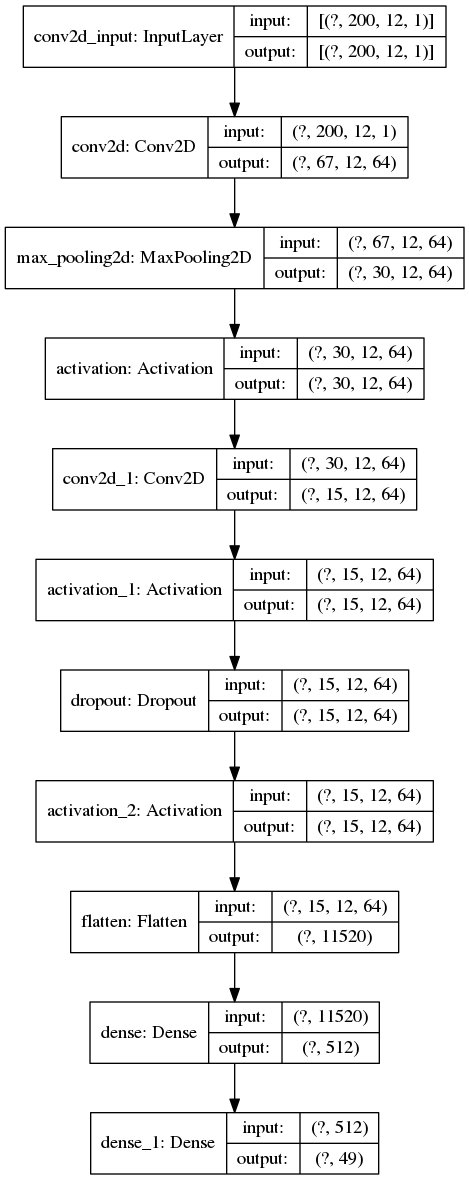

In [34]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [ ]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/CNN_200X12.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
766/766 [==============================] - ETA: 0s - loss: 3.5481 - accuracy: 0.0797
Epoch 00001: val_accuracy improved from -inf to 0.10158, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 40s 52ms/step - loss: 3.5481 - accuracy: 0.0797 - val_loss: 3.4333 - val_accuracy: 0.1016
Epoch 2/500
764/766 [============================>.] - ETA: 0s - loss: 3.3977 - accuracy: 0.1054
Epoch 00002: val_accuracy improved from 0.10158 to 0.11184, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 16s 21ms/step - loss: 3.3976 - accuracy: 0.1054 - val_loss: 3.3712 - val_accuracy: 0.1118
Epoch 3/500
764/766 [============================>.] - ETA: 0s - loss: 3.3411 - accuracy: 0.1154
Epoch 00003: val_accuracy improved from 0.11184 to 0.11863, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN2

763/766 [============================>.] - ETA: 0s - loss: 2.9057 - accuracy: 0.2067
Epoch 00022: val_accuracy improved from 0.17926 to 0.18265, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 16s 21ms/step - loss: 2.9055 - accuracy: 0.2067 - val_loss: 3.0117 - val_accuracy: 0.1827
Epoch 23/500
763/766 [============================>.] - ETA: 0s - loss: 2.8895 - accuracy: 0.2105
Epoch 00023: val_accuracy improved from 0.18265 to 0.18311, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 17s 22ms/step - loss: 2.8894 - accuracy: 0.2106 - val_loss: 3.0025 - val_accuracy: 0.1831
Epoch 24/500
766/766 [==============================] - ETA: 0s - loss: 2.8742 - accuracy: 0.2144
Epoch 00024: val_accuracy improved from 0.18311 to 0.18628, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/c

763/766 [============================>.] - ETA: 0s - loss: 2.6211 - accuracy: 0.2778
Epoch 00043: val_accuracy improved from 0.21513 to 0.21634, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 16s 21ms/step - loss: 2.6210 - accuracy: 0.2778 - val_loss: 2.8735 - val_accuracy: 0.2163
Epoch 44/500
766/766 [==============================] - ETA: 0s - loss: 2.6104 - accuracy: 0.2799
Epoch 00044: val_accuracy improved from 0.21634 to 0.21723, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 17s 22ms/step - loss: 2.6104 - accuracy: 0.2799 - val_loss: 2.8675 - val_accuracy: 0.2172
Epoch 45/500
763/766 [============================>.] - ETA: 0s - loss: 2.5980 - accuracy: 0.2834
Epoch 00045: val_accuracy improved from 0.21723 to 0.21794, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/c

Epoch 66/500
764/766 [============================>.] - ETA: 0s - loss: 2.3770 - accuracy: 0.3400
Epoch 00066: val_accuracy improved from 0.23102 to 0.23151, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 16s 21ms/step - loss: 2.3770 - accuracy: 0.3400 - val_loss: 2.8281 - val_accuracy: 0.2315
Epoch 67/500
765/766 [============================>.] - ETA: 0s - loss: 2.3675 - accuracy: 0.3421
Epoch 00067: val_accuracy did not improve from 0.23151
766/766 [==============================] - 17s 22ms/step - loss: 2.3675 - accuracy: 0.3421 - val_loss: 2.8261 - val_accuracy: 0.2313
Epoch 68/500
764/766 [============================>.] - ETA: 0s - loss: 2.3557 - accuracy: 0.3457
Epoch 00068: val_accuracy improved from 0.23151 to 0.23172, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/checkpoint.hdf5
766/766 [==============================] - 16s 21ms/step - loss: 2.3557 -

Epoch 92/500
764/766 [============================>.] - ETA: 0s - loss: 2.1263 - accuracy: 0.4049
Epoch 00092: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 20ms/step - loss: 2.1264 - accuracy: 0.4049 - val_loss: 2.8495 - val_accuracy: 0.2348
Epoch 93/500
765/766 [============================>.] - ETA: 0s - loss: 2.1190 - accuracy: 0.4065
Epoch 00093: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 2.1192 - accuracy: 0.4065 - val_loss: 2.8573 - val_accuracy: 0.2332
Epoch 94/500
763/766 [============================>.] - ETA: 0s - loss: 2.1080 - accuracy: 0.4094
Epoch 00094: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 2.1081 - accuracy: 0.4094 - val_loss: 2.8592 - val_accuracy: 0.2338
Epoch 95/500
763/766 [============================>.] - ETA: 0s - loss: 2.0995 - accuracy: 0.4110
Epoch 00095: val_accuracy did not improve fr

Epoch 121/500
763/766 [============================>.] - ETA: 0s - loss: 1.8630 - accuracy: 0.4743
Epoch 00121: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.8629 - accuracy: 0.4743 - val_loss: 2.9529 - val_accuracy: 0.2295
Epoch 122/500
763/766 [============================>.] - ETA: 0s - loss: 1.8550 - accuracy: 0.4767
Epoch 00122: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.8549 - accuracy: 0.4768 - val_loss: 2.9541 - val_accuracy: 0.2297
Epoch 123/500
766/766 [==============================] - ETA: 0s - loss: 1.8462 - accuracy: 0.4791
Epoch 00123: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.8462 - accuracy: 0.4791 - val_loss: 2.9562 - val_accuracy: 0.2307
Epoch 124/500
765/766 [============================>.] - ETA: 0s - loss: 1.8370 - accuracy: 0.4806
Epoch 00124: val_accuracy did not improv

Epoch 150/500
764/766 [============================>.] - ETA: 0s - loss: 1.6189 - accuracy: 0.5392
Epoch 00150: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.6192 - accuracy: 0.5391 - val_loss: 3.0887 - val_accuracy: 0.2249
Epoch 151/500
766/766 [==============================] - ETA: 0s - loss: 1.6112 - accuracy: 0.5414
Epoch 00151: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.6112 - accuracy: 0.5414 - val_loss: 3.0926 - val_accuracy: 0.2242
Epoch 152/500
764/766 [============================>.] - ETA: 0s - loss: 1.6027 - accuracy: 0.5431
Epoch 00152: val_accuracy did not improve from 0.23505
766/766 [==============================] - 16s 21ms/step - loss: 1.6027 - accuracy: 0.5431 - val_loss: 3.1065 - val_accuracy: 0.2233
Epoch 153/500
766/766 [==============================] - ETA: 0s - loss: 1.5933 - accuracy: 0.5461

In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

In [ ]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN200X12/CNN__ninaDB2_200X12')

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))